In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [168]:
data= pd.read_csv("dataset.csv")
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [169]:
#check if there is any duplicate
data.duplicated().sum() 

0

In [170]:
#check if there is null values for each column
data.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [171]:
# add average score into the dataset, which is calculated from the mean of math score, reading score, writing score
data['average score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1).astype(int)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


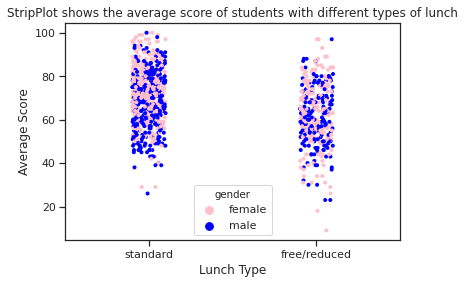

In [175]:
custom_palette = {'male': 'blue', 'female': 'pink'}

with sns.axes_style(style='ticks'):
    graph1 = sns.stripplot(x="lunch", y="average score", hue='gender', data=data, palette= custom_palette, size =4)
    graph1.set_xlabel("Lunch Type")
    graph1.set_ylabel("Average Score")
    graph1.set_title("StripPlot shows the average score of students with different types of lunch")
    plt.show()

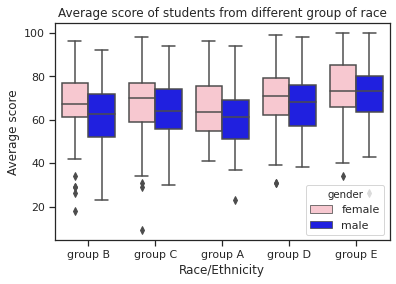

In [174]:
custom_palette = {'male': 'blue', 'female': 'pink'}

with sns.axes_style(style='ticks'):
    graph2 = sns.boxplot(x="race/ethnicity", y="average score", hue='gender', data=data,palette=custom_palette)
    graph2.set_xlabel("Race/Ethnicity")
    graph2.set_ylabel("Average score")
    graph2.set_title("Average score of students from different group of race")
    plt.show()


In [158]:
#using Label Encoder to convert data to numerical values
data['parental level of education'] = LabelEncoder().fit_transform(data['parental level of education'])

data['race/ethnicity'] = LabelEncoder().fit_transform(data['race/ethnicity'])

data['lunch'] =LabelEncoder().fit_transform(data['lunch'])

data['test preparation course'] = LabelEncoder().fit_transform(data['test preparation course'])

data.head(10)
#race:group A is 0,group B is 1, group C is 2, group D is 3, group E is 4
# parental level eduacation: bachelor's degree: 1; some college: 4, master's degree:3, associate's degree: 0,
#highschool:2, some highschool 5 
# lunch: standard: 1; free/reduced:0
#test prep: 1:none, 0: completed
#female= 0, male =1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,1,1,1,1,72,72,74,72
1,female,2,4,1,0,69,90,88,82
2,female,1,3,1,1,90,95,93,92
3,male,0,0,0,1,47,57,44,49
4,male,2,4,1,1,76,78,75,76
5,female,1,0,1,1,71,83,78,77
6,female,1,4,1,0,88,95,92,91
7,male,1,4,0,1,40,43,39,40
8,male,3,2,0,0,64,64,67,65
9,female,1,2,0,1,38,60,50,49


In [159]:
#using linear regression SVC for prediction 
X = data['parental level of education']
y =data['average score']
# creates clusters of points normally distributed (std=1) with number of samples are 1000, and the rest
#are set as default 
X, y = make_classification(n_samples=1000)

# Split the dataset with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LinearSVC model with number of iterations is 1000
linear_model = LinearSVC(max_iter=1000)

# Train the model
linear_model.fit(X_train, y_train)

# evaluate the model on the test set of data
y_prediction = linear_model.predict(X_test)

# calculate the accuracy of prediction
accuracy = accuracy_score(y_test, y_prediction)

print("Accuracy: %.2f" % accuracy)

Accuracy: 0.96


/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
